# Phase 3 SQL Operations:-

Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [1]:
import sqlite3
import csv

# 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [2]:
conn = sqlite3.connect('crime_against_women.db')

In [3]:
conn.execute("DROP TABLE IF EXISTS CRIME")

In [4]:
conn = sqlite3.connect('crime_against_women.db')
conn.execute('''CREATE TABLE CRIME
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Rape INTEGER,Kidnapping INTEGER,Dowry INTEGER,Assault  INTEGER,Insult INTEGER,Cruelty INTEGER,Importation_of_Girls INTEGER)''')

In [5]:
cursor=conn.cursor()

In [6]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Rape,Kidnapping,Dowry,Assault,Insult,Cruelty,Importation_of_Girls) VALUES (?, ?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))
        conn.commit()

In [7]:
column=cursor.execute('select*from CRIME')
for row in column:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 19, 31, 188, 59, 214, 0)
('AN

# 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

RAPES  DISTRICT -WISE

In [8]:
sql=cursor.execute("SELECT STATE, DISTRICT,Year,max(Rape) FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Rape desc")
for row in column:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2009, 568)


RAPES  STATE -WISE

In [9]:
sql=cursor.execute("SELECT STATE,Year,sum(Rape) AS TOTAL_STATEWISE_RAPE FROM CRIME GROUP BY STATE,Year having DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_RAPE desc LIMIT 1")
for row in sql:
    print(row)

('MADHYA PRADESH', 2012, 6850)


KIDNAPPINGS  DISTRICT -WISE


In [10]:
sql=cursor.execute("SELECT STATE, DISTRICT,Year,max(Kidnapping) FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Kidnapping desc")
for row in sql:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 492)


 KIDNAPPINGS  STATE -WISE

In [11]:
sql=cursor.execute("SELECT STATE,Year,sum(Kidnapping) AS TOTAL_STATEWISE_Kidnapping FROM CRIME GROUP BY STATE,Year having DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY TOTAL_STATEWISE_Kidnapping desc LIMIT 1")
for row in sql:
    print(row)

('UTTAR PRADESH', 2012, 15820)


# 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

RAPES DISTRICT -WISE

In [12]:
sql=cursor.execute("SELECT STATE, DISTRICT,Year,Rape FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') AND Rape==0  ORDER BY Rape ")
for row in sql:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'KAMENG WEST', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('BIHAR', 'KATIHAR RLY.', 2001, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0)
('HARYANA', 'GRP', 2001, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0)
('JAMMU & KASHMIR', 'KARGIL', 2001, 0)
('JAMMU & KASHMIR', 'LEH', 2001, 0)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0)
('MANIPUR', 'CHANDEL', 2001, 0)
('MANIPUR', 'SENAPATI', 2001, 0)
('MANIPUR', 'TAMENGLONG', 2001, 0)
('MANIPUR', 'UKHRUL', 2001, 0)
('MIZORAM', 'MAMIT', 2001, 0)
('NAGALAND', 'KIPHIRE', 2001, 0)
('NAGALAND', 'PEREN', 2001, 0)
('NAGALAND', 'TUENSANG', 2001, 0)
('PUNJAB', 'G.R.P', 2001, 0)
('SIKKIM', 'NORTH', 2001, 0)
('SIKKIM', 'WEST', 2001, 0)
('TAMIL NADU', 'CHENNAI R

RAPES STATE-WISE

In [13]:
sql=cursor.execute("SELECT STATE,Year,sum(Rape) AS TOTAL_STATEWISE_RAPE FROM CRIME GROUP BY STATE,Year having DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') AND TOTAL_STATEWISE_RAPE==0 ORDER BY TOTAL_STATEWISE_RAPE")
for row in sql:
    print(row)

('DAMAN & DIU', 2001, 0)
('DAMAN & DIU', 2002, 0)
('DAMAN & DIU', 2008, 0)
('LAKSHADWEEP', 2001, 0)
('LAKSHADWEEP', 2004, 0)
('LAKSHADWEEP', 2005, 0)
('LAKSHADWEEP', 2006, 0)
('LAKSHADWEEP', 2010, 0)
('LAKSHADWEEP', 2011, 0)
('LAKSHADWEEP', 2012, 0)


Kidnapping DISTRICT -WISE

In [14]:
sql=cursor.execute("SELECT STATE, DISTRICT,Year,Kidnapping FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') AND Kidnapping==0 ORDER BY Kidnapping")
for row in sql:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('ASSAM', 'G.R.P.', 2001, 0)
('ASSAM', 'R.P.O.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('BIHAR', 'JAMALPUR RLY.', 2001, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0)
('CHHATTISGARH', 'KAWARDHA', 2001, 0)
('GUJARAT', 'W.RLY', 2001, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0)
('JHARKHAND', 'DHANBAD RLY.', 2001, 0)
('JHARKHAND', 'DUMKA', 2001, 0)
('JHARKHAND', 'JAMSHEDPUR RLY.', 2001, 0)
('JHARKHAND', 'PAKUR', 2001, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0)
('KARNATAKA', 'HASSAN', 2001, 0)
('KARNATAKA', 'RAILWAYS', 2001, 0)
('KARNATAKA', 'UDUPI', 2001, 0)
('KERALA', 'CBCID', 2001, 0)
('KE

Kidnapping STATE-WISE

In [15]:
sql=cursor.execute("SELECT STATE,Year,sum(Kidnapping) AS TOTAL_STATEWISE_Kidnapping FROM CRIME GROUP BY STATE,Year having DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') AND TOTAL_STATEWISE_Kidnapping==0 ORDER BY TOTAL_STATEWISE_Kidnapping")
for row in sql:
    print(row)

('DAMAN & DIU', 2004, 0)
('DAMAN & DIU', 2009, 0)
('DAMAN & DIU', 2012, 0)
('LAKSHADWEEP', 2001, 0)
('LAKSHADWEEP', 2002, 0)
('LAKSHADWEEP', 2003, 0)
('LAKSHADWEEP', 2004, 0)
('LAKSHADWEEP', 2005, 0)
('LAKSHADWEEP', 2006, 0)
('LAKSHADWEEP', 2007, 0)
('LAKSHADWEEP', 2009, 0)
('LAKSHADWEEP', 2010, 0)
('LAKSHADWEEP', 2011, 0)
('LAKSHADWEEP', 2012, 0)
('MIZORAM', 2004, 0)
('MIZORAM', 2005, 0)
('MIZORAM', 2007, 0)
('MIZORAM', 2009, 0)
('MIZORAM', 2010, 0)
('MIZORAM', 2011, 0)
('SIKKIM', 2003, 0)


In [18]:
conn.execute("DROP TABLE IF EXISTS CRIME_st")

# 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [19]:
conn = sqlite3.connect('crime_against_st.db')
conn.execute('''CREATE TABLE CRIME_st
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Murder INTEGER,Rape INTEGER,Kidnapping INTEGER,Dacoity INTEGER,Robbery  INTEGER,Arson  INTEGER,Hurt INTEGER, Protection  INTEGER,Prevention INTEGER,Other Crimes INTEGER)''')

In [20]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO CRIME_st (STATE, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))

In [21]:
column=conn.execute('select*from CRIME_st')
for row in column:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

# 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

# Dacoity

In [22]:
sql=conn.execute("SELECT DISTRICT,sum(Dacoity) FROM CRIME_st GROUP BY DISTRICT HAVING  DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY  Dacoity DESC limit 1")
for row in sql:
    print(row)

('DAHOD', 81)


# Robbery

In [23]:
sql=conn.execute("SELECT DISTRICT,sum(Robbery) FROM CRIME_st GROUP BY DISTRICT HAVING  DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY  Robbery DESC limit 1")
for row in sql:
    print(row)

('DAHOD', 121)


# 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [24]:
sql=conn.execute("SELECT DISTRICT,sum(Murder) FROM CRIME_st GROUP BY DISTRICT HAVING  DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') and Murder==0 ORDER BY Murder")
for row in sql:
    print(row)

('24 PARGANAS NORTH', 0)
('24 PARGANAS SOUTH', 0)
('A and N ISLANDS', 0)
('ADILABAD', 1)
('AGRA', 0)
('AHMEDABAD COMMR.', 3)
('AHMEDABAD RURAL', 2)
('AHWA-DANG', 0)
('AIZAWL', 0)
('AJMER', 1)
('AKOLA', 0)
('ALAPUZHA', 0)
('ALIRAJPUR', 1)
('ALLAHABAD', 1)
('ALMORA', 0)
('ALWAR', 22)
('AMBALA', 0)
('AMBALA RURAL', 0)
('AMBALA URBAN', 0)
('AMBEDKAR NAGAR', 0)
('AMRAVATI COMMR.', 0)
('AMRAVATI RURAL', 4)
('AMRELI', 0)
('AMRITSAR', 0)
('AMRITSAR RURAL', 0)
('ANAND', 2)
('ANANTAPUR', 1)
('ANANTNAG', 0)
('ANDAMAN', 1)
('ANGUL', 2)
('ANJAW', 0)
('ANUPPUR', 12)
('ARIYALUR', 0)
('ARWAL', 0)
('ASANSOL', 0)
('ASHOK NAGAR', 7)
('AURAIYA', 0)
('AURANGABAD', 0)
('AURANGABAD COMMR.', 0)
('AURANGABAD RURAL', 3)
('AWANTIPORA', 0)
('AZAMGARH', 0)
('BADAUN', 0)
('BADDIPOLICEDIST', 0)
('BAGAHA', 0)
('BAGALKOT', 7)
('BAGESHWAR', 0)
('BAGHPAT', 0)
('BAHRAICH', 0)
('BAKSA', 0)
('BALASORE', 0)
('BALLIA', 0)
('BALOD', 0)
('BALODA BAZAR', 0)
('BALRAMPUR', 16)
('BANDA', 0)
('BANDIPORA', 0)
('BANGALORE COMMR.', 1)

# 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise

In [25]:
sql=conn.execute("SELECT DISTRICT,Year,Murder FROM CRIME_st WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY Murder and Year")
for row in sql:
    print(row)

('ADILABAD', 2001, 0)
('ANANTAPUR', 2001, 0)
('CHITTOOR', 2001, 0)
('CUDDAPAH', 2001, 0)
('EAST GODAVARI', 2001, 0)
('GUNTAKAL RLY.', 2001, 0)
('GUNTUR', 2001, 0)
('HYDERABAD CITY', 2001, 0)
('KARIMNAGAR', 2001, 0)
('KRISHNA', 2001, 0)
('KURNOOL', 2001, 0)
('MEDAK', 2001, 0)
('NIZAMABAD', 2001, 0)
('PRAKASHAM', 2001, 0)
('RANGA REDDY', 2001, 0)
('SECUNDERABAD RLY.', 2001, 0)
('SRIKAKULAM', 2001, 0)
('VIJAYAWADA', 2001, 0)
('VIJAYAWADA RLY.', 2001, 0)
('VISAKHA RURAL', 2001, 0)
('VISAKHAPATNAM', 2001, 0)
('VIZIANAGARAM', 2001, 0)
('WARANGAL', 2001, 0)
('WEST GODAVARI', 2001, 0)
('CHANGLANG', 2001, 0)
('DIBANG VALLEY', 2001, 0)
('KAMENG EAST', 2001, 0)
('KAMENG WEST', 2001, 0)
('SIANG UPPER', 2001, 0)
('SIANG WEST', 2001, 0)
('SUBANSIRI LOWER', 2001, 0)
('SUBANSIRI UPPER', 2001, 0)
('TAWANG', 2001, 0)
('TIRAP', 2001, 0)
('BARPETA', 2001, 0)
('BONGAIGAON', 2001, 0)
('C.I.D.', 2001, 0)
('CACHAR', 2001, 0)
('DARRANG', 2001, 0)
('DHEMAJI', 2001, 0)
('DHUBRI', 2001, 0)
('DIBRUGARH', 2001, 0)


# 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [28]:
conn.execute("DROP TABLE IF EXISTS CRIME_ipc")

In [29]:
conn = sqlite3.connect('crime_against_ipc.db')
conn.execute('''CREATE TABLE CRIME_ipc
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')

In [30]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO CRIME_ipc (STATE, DISTRICT,Year,MURDER,ATTEMPT_MURDER,CULPABLE_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING,KIDNAPPING_GIRLS,KIDNAPPING_OTHERS,DACOITY,PREPARATION_DACOITY,ROBBERY,BURGLARY,THEFT,AUTO_THEFT,OTHER_THEFT,RIOTS,CRIMINAL_TRUST,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT_WOMEN,INSULT_WOMEN,CRUELTY_HUSBAND,IMPORTATION,CAUSING_DEATH,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'],row['RAPE'],row['CUSTODIAL RAPE'],row['OTHER RAPE'],row['KIDNAPPING & ABDUCTION'],row['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],row['KIDNAPPING AND ABDUCTION OF OTHERS'],row['DACOITY'],row['PREPARATION AND ASSEMBLY FOR DACOITY'],row['ROBBERY'],row['BURGLARY'],row['THEFT'],row['AUTO THEFT'],row['OTHER THEFT'],row['RIOTS'],row['CRIMINAL BREACH OF TRUST'],row['CHEATING'],row['COUNTERFIETING'],row['ARSON'],row['HURT/GREVIOUS HURT'],row['DOWRY DEATHS'],row['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],row['INSULT TO MODESTY OF WOMEN'],row['CRUELTY BY HUSBAND OR HIS RELATIVES'],row['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],row['CAUSING DEATH BY NEGLIGENCE'],row['OTHER IPC CRIMES'],row['TOTAL IPC CRIMES']))

In [31]:
column=conn.execute('select*from CRIME_ipc')
for row in column:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 17, 50, 0, 50, 46, 30, 16, 9, 0, 41, 198, 199, 22, 177, 78, 16, 104, 1, 30, 1131, 16, 149, 34, 175, 0, 181, 1518, 4154)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 1, 23, 0, 23, 53, 30, 23, 8, 0, 16, 191, 366, 57, 309, 168, 11, 65, 8, 69, 1543, 7, 118, 24, 154, 0, 270, 754, 4125)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 2, 27, 0, 27, 59, 34, 25, 4, 0, 14, 237, 723, 164, 559, 156, 33, 209, 9, 38, 2088, 14, 112, 83, 186, 0, 404, 1262, 5818)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 1, 20, 0, 20, 25, 20, 5, 1, 0, 4, 98, 173, 36, 137, 164, 12, 37, 2, 23, 795, 17, 126, 38, 57, 0, 233, 1181, 3140)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 1, 23, 0, 23, 49, 26, 23, 4, 0, 25, 437, 1021, 150, 871, 70, 50, 220, 3, 41, 1244, 12, 109, 58, 247, 0, 431, 2313, 6507)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 162, 0, 162, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 4, 104, 287)
('ANDHRA PRADESH', 'GUNTUR', 200

# 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [32]:
sql1=conn.execute("SELECT STATE,YEAR,DISTRICT,SUM(MURDER) FROM CRIME_IPC GROUP BY STATE,YEAR having DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY STATE AND YEAR DESC ")
for row in sql1:
    print(row)

('A & N ISLANDS', 2001, 'ANDAMAN', 26)
('A & N ISLANDS', 2002, 'ANDAMAN', 34)
('A & N ISLANDS', 2003, 'ANDAMAN', 42)
('A & N ISLANDS', 2004, 'ANDAMAN', 30)
('A & N ISLANDS', 2005, 'ANDAMAN', 28)
('A & N ISLANDS', 2006, 'ANDAMAN', 8)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 30)
('A & N ISLANDS', 2008, 'ANDAMAN', 16)
('A & N ISLANDS', 2009, 'ANDAMAN', 30)
('A & N ISLANDS', 2010, 'ANDAMAN', 18)
('A & N ISLANDS', 2011, 'ANDAMAN', 28)
('A & N ISLANDS', 2012, 'CAR', 30)
('ANDHRA PRADESH', 2001, 'ADILABAD', 5204)
('ANDHRA PRADESH', 2002, 'ADILABAD', 5050)
('ANDHRA PRADESH', 2003, 'ADILABAD', 5334)
('ANDHRA PRADESH', 2004, 'ADILABAD', 5158)
('ANDHRA PRADESH', 2005, 'ADILABAD', 5500)
('ANDHRA PRADESH', 2006, 'ADILABAD', 5532)
('ANDHRA PRADESH', 2007, 'ADILABAD', 5330)
('ANDHRA PRADESH', 2008, 'ADILABAD', 5380)
('ANDHRA PRADESH', 2009, 'ADILABAD', 4898)
('ANDHRA PRADESH', 2010, 'ADILABAD', 5076)
('ANDHRA PRADESH', 2011, 'ADILABAD', 5616)
('ANDHRA PRADESH', 2012, 'ADILABAD', 5434)
('ARUNACHAL P

# 3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [33]:
import pandas as pd

In [34]:
sql1=conn.execute("SELECT STATE,YEAR,DISTRICT,SUM(MURDER) as MURDER FROM CRIME_IPC GROUP BY STATE,YEAR having DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL') ORDER BY STATE AND YEAR DESC ")
data=pd.DataFrame(sql1)
print(data)

                 0     1                  2     3
0    A & N ISLANDS  2001            ANDAMAN    26
1    A & N ISLANDS  2002            ANDAMAN    34
2    A & N ISLANDS  2003            ANDAMAN    42
3    A & N ISLANDS  2004            ANDAMAN    30
4    A & N ISLANDS  2005            ANDAMAN    28
..             ...   ...                ...   ...
415    WEST BENGAL  2008  24 PARGANAS NORTH  3622
416    WEST BENGAL  2009  24 PARGANAS NORTH  4136
417    WEST BENGAL  2010  24 PARGANAS NORTH  4796
418    WEST BENGAL  2011  24 PARGANAS NORTH  4218
419    WEST BENGAL  2012  24 PARGANAS NORTH  4504

[420 rows x 4 columns]


In [35]:
sql1.description

(('STATE', None, None, None, None, None, None),
 ('Year', None, None, None, None, None, None),
 ('DISTRICT', None, None, None, None, None, None),
 ('MURDER', None, None, None, None, None, None))

In [36]:
data.columns=[x[0] for x in sql1.description]
data

,STATE,Year,DISTRICT,MURDER
0,A & N ISLANDS,2001,ANDAMAN,26
1,A & N ISLANDS,2002,ANDAMAN,34
2,A & N ISLANDS,2003,ANDAMAN,42
3,A & N ISLANDS,2004,ANDAMAN,30
4,A & N ISLANDS,2005,ANDAMAN,28
...,...,...,...,...
415,WEST BENGAL,2008,24 PARGANAS NORTH,3622
416,WEST BENGAL,2009,24 PARGANAS NORTH,4136
417,WEST BENGAL,2010,24 PARGANAS NORTH,4796
418,WEST BENGAL,2011,24 PARGANAS NORTH,4218


In [37]:
from collections import Counter

In [38]:
hehe=data['STATE'].unique().tolist()

In [39]:
ind=[]
for i in hehe:
    rep=[]
    for j in (data[data['STATE']==i].index.tolist()):
        rep.append(data[data['STATE']==i]['DISTRICT'][j])
    ff=Counter(rep)
    lil=[]
    for p in ff.keys():
        if(ff[p]>=3):
            lil.append(p)
    for k in lil:
        ind.extend(data[data['DISTRICT']==k].index.to_list())
new_data=data.iloc[ind].copy()   

In [40]:
Counter(new_data['DISTRICT'])

Counter({'ANDAMAN': 10,
         'ADILABAD': 12,
         'CHANGLANG': 8,
         'ANJAW': 4,
         'BARPETA': 11,
         'ARARIA': 12,
         'CHANDIGARH': 12,
         'BALRAMPUR': 11,
         'D and N HAVELI': 12,
         'DAMAN': 12,
         'CENTRAL': 7,
         'CAW': 5,
         'NORTH GOA': 12,
         'AHMEDABAD COMMR.': 12,
         'AMBALA': 11,
         'BILASPUR': 8,
         'BADDIPOLICEDIST': 4,
         'ANANTNAG': 12,
         'BOKARO': 12,
         'BAGALKOT': 12,
         'ALAPUZHA': 12,
         'LAKSHADWEEP': 12,
         'ANUPPUR': 5,
         'ALIRAJPUR': 5,
         'AHMEDNAGAR': 12,
         'BISHNUPUR': 12,
         'GARO HILLS EAST': 12,
         'AIZAWL': 12,
         'DIMAPUR': 12,
         'ANGUL': 12,
         'PONDICHERRY': 5,
         'KARAIKAL': 7,
         'AMRITSAR': 10,
         'AJMER': 12,
         'EAST': 12,
         'ARIYALUR': 5,
         'CHENGAI': 3,
         'CHENNAI': 4,
         'DHALAI': 12,
         'AGRA': 12,
         'AL

IT CAN BE SEEN THAT ONLY THOSE DISTRICTS ARE THERE IN WHICH THE COUNT IN EQUAL OR MORE THAN 3!!

In [41]:
new_data.sort_values(by='MURDER',ascending=False,inplace=True)

In [42]:
new_data

,STATE,Year,DISTRICT,MURDER
384,UTTAR PRADESH,2001,AGRA,15202
385,UTTAR PRADESH,2002,AGRA,13650
387,UTTAR PRADESH,2004,AGRA,12252
388,UTTAR PRADESH,2005,AGRA,11422
389,UTTAR PRADESH,2006,AGRA,10960
...,...,...,...,...
227,LAKSHADWEEP,2012,LAKSHADWEEP,0
217,LAKSHADWEEP,2002,LAKSHADWEEP,0
219,LAKSHADWEEP,2004,LAKSHADWEEP,0
218,LAKSHADWEEP,2003,LAKSHADWEEP,0


# 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [43]:
dwm=new_data.groupby(by='DISTRICT').sum().reset_index().sort_values(by='MURDER',ascending=False)

In [44]:
dwm

,DISTRICT,Year,MURDER
2,AGRA,24078,130886
17,ARARIA,24078,82490
4,AHMEDNAGAR,24078,65534
1,ADILABAD,24078,63512
0,24 PARGANAS NORTH,24078,42112
20,BAGALKOT,24078,39874
25,BOKARO,24078,38120
6,AJMER,24078,31688
14,ANGUL,24078,28906
22,BARPETA,22066,28128


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

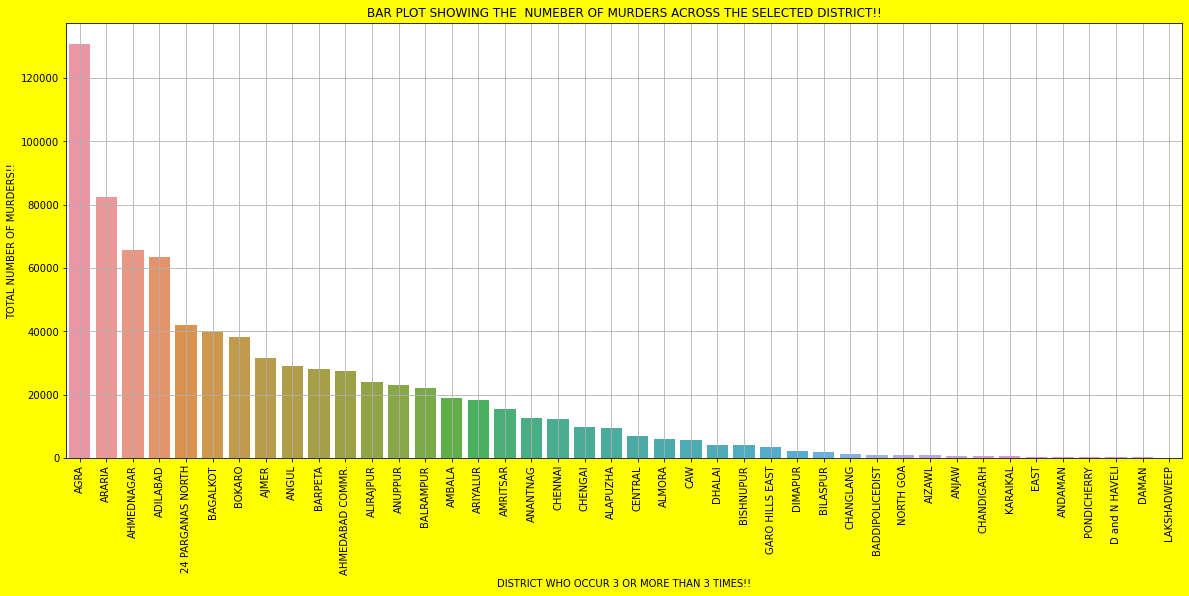

In [46]:
plt.figure(figsize=(20,8),facecolor='Yellow')
sns.barplot(x=dwm['DISTRICT'],y=dwm['MURDER'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICT WHO OCCUR 3 OR MORE THAN 3 TIMES!!")
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.grid()
plt.title("BAR PLOT SHOWING THE  NUMEBER OF MURDERS ACROSS THE SELECTED DISTRICT!!")
plt.show()

AGRA HAVE THE HIGHEST NUMBER OF MURDERS RECORDED ACROSS ALL THE SELECTED DISTRICTS

LAKSHDWEEP REPORTS THE LOWEST NUMBERS AMONG ALL

In [48]:
xx=new_data.groupby(by='Year').sum().reset_index().sort_values(by='MURDER',ascending=False)

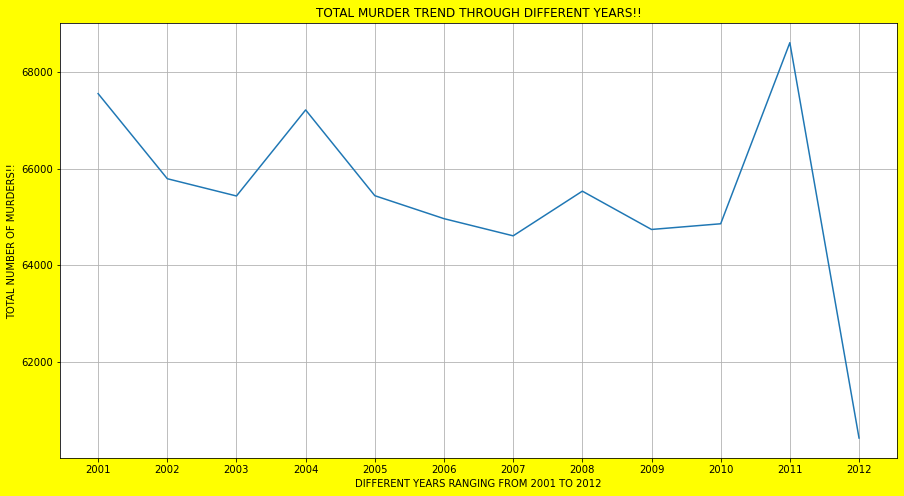

In [51]:
plt.figure(figsize=(15,8),facecolor='Yellow')
sns.lineplot(x=xx['Year'],y=xx['MURDER'])
plt.xlabel("DIFFERENT YEARS RANGING FROM 2001 TO 2012")
plt.xticks([x for x in range(2001,2013)])
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.grid()
plt.title("TOTAL MURDER TREND THROUGH DIFFERENT YEARS!!")
plt.show()

ITS QUEIT VISIBLE FROM THE ABOVE GRAPH THAT THERE IS OVERALL DESCREASE IN THE TOTAL NUMBER OF MURDERS FROM THE YEAR 2001 TO 2012 IN TOTAL

YEAR 2010 RECORDS THE LOWEST NUMBER OF MURDERS AMONG ALL THE YEARS

# Find the phase 4 in other notebook